In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xarray as xr


In [8]:
daily_data = pd.read_csv('/content/daily_data.csv')
hourly_data = pd.read_csv('/content/hourly_data.csv')
monthly_data= pd.read_csv('/content/monthly_data.csv')
three_hour_data = pd.read_csv('/content/three_hour_data.csv')
print(daily_data.head())
print(hourly_data.head())
print(monthly_data.head())
print(three_hour_data.head())

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0            

<ipython-input-8-58095f227ef5>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_data.csv')


In [9]:
daily_data.dropna()
hourly_data.dropna()
monthly_data.dropna()
three_hour_data.dropna()

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T01:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.09,8,46,30.05,29.72,9.94,18,150,10,9/8/2006
1,72518014735,2015-01-01T04:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.02,6,57,30.03,29.7,9.94,16,190,7,9/8/2006
2,72518014735,2015-01-01T07:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.02,1,52,30.05,29.72,9.94,17,160,9,9/8/2006
3,72518014735,2015-01-01T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,-0.01,3,44,30.06,29.72,9.94,21,180,11,9/8/2006
4,72518014735,2015-01-01T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,0.11,8,38,29.95,29.62,9.94,23,170,15,9/8/2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20838,72518014735,2022-05-31T10:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,8,45,29.94,29.63,9.94,71,280,13,9/8/2006
20839,72518014735,2022-05-31T13:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.04,6,38,29.9,29.59,9.94,73,280,8,9/8/2006
20840,72518014735,2022-05-31T16:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,0.03,6,37,29.87,29.57,9.94,71,250,18,9/8/2006
20841,72518014735,2022-05-31T19:00:00,FM-12,4,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",...,-0.01,3,42,29.88,29.57,9.94,69,260,11,9/8/2006


In [10]:
daily_data.describe()
hourly_data.describe()

,STATION,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,HourlyRelativeHumidity,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindSpeed
count,6.472900e+04,64729.000000,64729.0,64729.000000,64729.000000,64729.000000,64729.000000,64729.000000,64729.000000
mean,7.251801e+10,6.994207,260.0,42.689775,-73.828303,66.361538,9.315017,44.324878,7.556103
std,0.000000e+00,0.075894,0.0,0.004167,0.005736,18.376979,2.128327,17.801866,5.735342
min,7.251801e+10,6.000000,260.0,42.681200,-73.831090,8.000000,0.000000,-14.000000,0.000000
25%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,53.000000,10.000000,31.000000,3.000000
50%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,67.000000,10.000000,45.000000,7.000000
75%,7.251801e+10,7.000000,260.0,42.691800,-73.831090,81.000000,10.000000,60.000000,11.000000
max,7.251801e+10,7.000000,260.0,42.691800,-73.816500,100.000000,99.420000,81.000000,43.000000


In [11]:
print(daily_data.isnull().sum())
is_any_missing_data=daily_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

In [12]:
print(hourly_data.isnull().sum())
is_any_missing_data=hourly_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64
Are there any missing values?
False


In [13]:
print(monthly_data.isnull().sum())
is_any_missing_data=monthly_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

STATION                                         0
DATE                                            0
REPORT_TYPE                                     0
SOURCE                                          0
AWND                                            0
BackupElements                                  0
BackupElevation                                 0
BackupEquipment                                 0
BackupLatitude                                  0
BackupLongitude                                 0
BackupName                                      0
CDSD                                            0
CLDD                                            0
DSNW                                            0
HDSD                                            0
HTDD                                            0
MonthlyDaysWithGT001Precip                      0
MonthlyDaysWithGT010Precip                      0
MonthlyDaysWithGT32Temp                         0
MonthlyDaysWithGT90Temp                         0


In [14]:
print(three_hour_data.isnull().sum())
is_any_missing_data=three_hour_data.isna().any().any()
print("Are there any missing values?")
print(is_any_missing_data)

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPressureChange         0
HourlyPressureTendency       0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64
Are there any missing values?
False


In [15]:
#Removing duplicates values
daily_data.drop_duplicates(inplace=True)
daily_data.duplicated().sum()

0

In [16]:
#Removing duplicates values
hourly_data.drop_duplicates(inplace=True)
hourly_data.duplicated().sum()

0

In [17]:
monthly_data.drop_duplicates(inplace=True)
monthly_data.duplicated().sum()

0

In [18]:
three_hour_data.drop_duplicates(inplace=True)
three_hour_data.duplicated().sum()

0

In [19]:
daily_data.info()
hourly_data.info()
monthly_data.info()
three_hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
daily_data = pd.read_csv("daily_data.csv")
hourly_data = pd.read_csv("hourly_data.csv")
monthly_data = pd.read_csv("monthly_data.csv")
three_hour_data = pd.read_csv("three_hour_data.csv")


<ipython-input-20-c24d40336da1>:7: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv("hourly_data.csv")


In [21]:
# Check the first few rows of each dataset
print("Daily Data:")
print(daily_data.head())
print("\nHourly Data:")
print(hourly_data.head())
print("\nMonthly Data:")
print(monthly_data.head())
print("\nThree Hour Data:")
print(three_hour_data.head())

# Check data types and missing values
print("\nData Types and Missing Values:")
print(daily_data.info())
print(hourly_data.info())
print(monthly_data.info())
print(three_hour_data.info())

# Summary statistics
print("\nSummary Statistics:")
print(daily_data.describe())
print(hourly_data.describe())
print(monthly_data.describe())
print(three_hour_data.describe())


Daily Data:
       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0

<ipython-input-22-28784a7aeed9>:7: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv("hourly_data.csv")


Missing Values:
Daily Data: STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximum

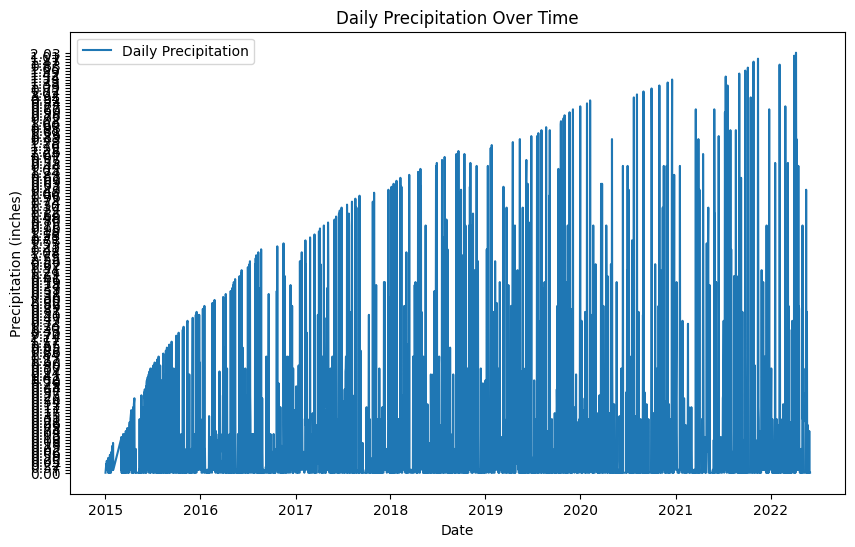

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
daily_data = pd.read_csv("daily_data.csv")
hourly_data = pd.read_csv("hourly_data.csv")
monthly_data = pd.read_csv("monthly_data.csv")
three_hour_data = pd.read_csv("three_hour_data.csv")

# Check for missing values
print("Missing Values:")
print("Daily Data:", daily_data.isnull().sum())
print("Hourly Data:", hourly_data.isnull().sum())
print("Monthly Data:", monthly_data.isnull().sum())
print("Three Hour Data:", three_hour_data.isnull().sum())

# Convert DATE column to datetime format
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])
hourly_data['DATE'] = pd.to_datetime(hourly_data['DATE'])
monthly_data['DATE'] = pd.to_datetime(monthly_data['DATE'])
three_hour_data['DATE'] = pd.to_datetime(three_hour_data['DATE'])

# Explore basic statistics
print("Basic Statistics:")
print("Daily Data:", daily_data.describe())
print("Hourly Data:", hourly_data.describe())
print("Monthly Data:", monthly_data.describe())
print("Three Hour Data:", three_hour_data.describe())

# Visualize time series
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Daily Precipitation')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

# More exploratory analysis and visualizations can be added as needed.


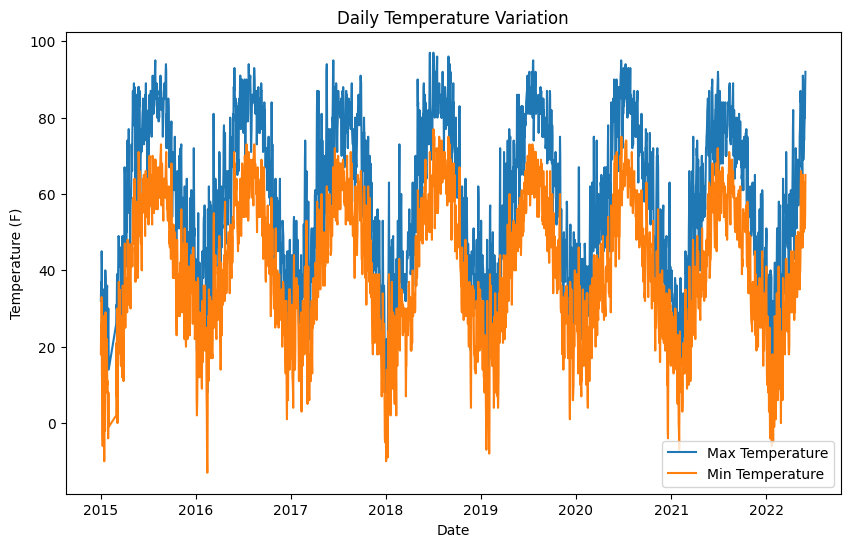

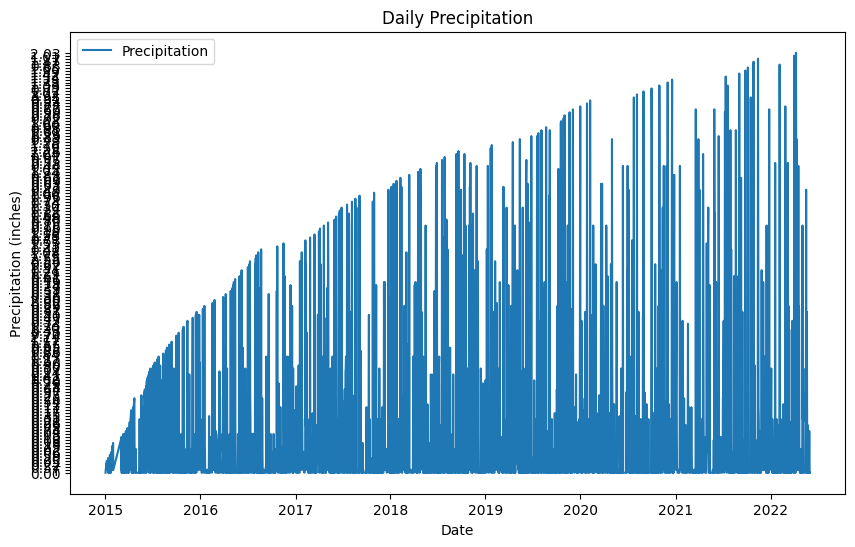

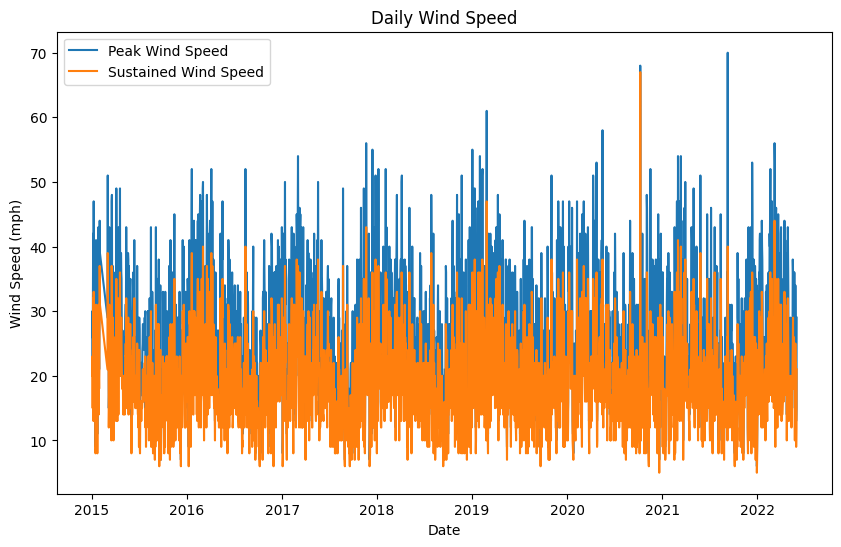

In [23]:
# Daily temperature variation
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyMaximumDryBulbTemperature'], label='Max Temperature')
plt.plot(daily_data['DATE'], daily_data['DailyMinimumDryBulbTemperature'], label='Min Temperature')
plt.title('Daily Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

# Daily precipitation
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPrecipitation'], label='Precipitation')
plt.title('Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

# Daily wind speed
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyPeakWindSpeed'], label='Peak Wind Speed')
plt.plot(daily_data['DATE'], daily_data['DailySustainedWindSpeed'], label='Sustained Wind Speed')
plt.title('Daily Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()


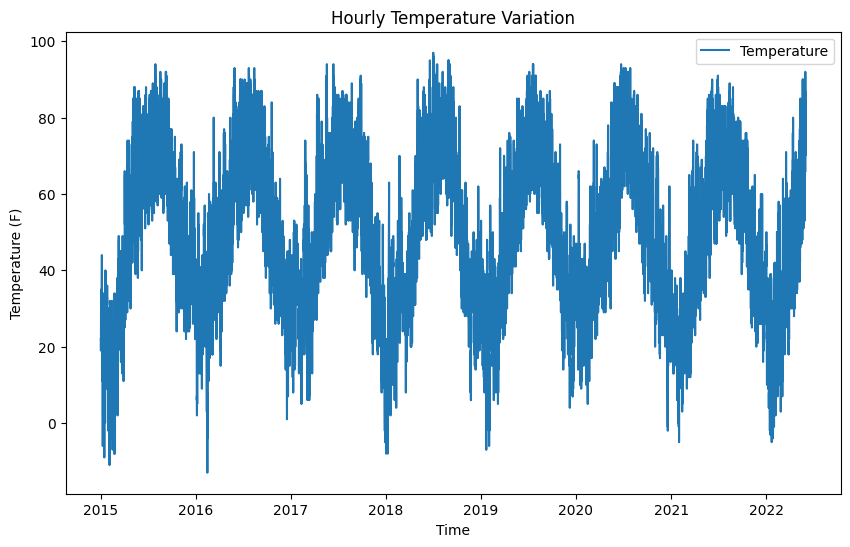

In [24]:
import numpy as np

# Convert non-numeric values to NaN
hourly_data['HourlyDryBulbTemperature'] = pd.to_numeric(hourly_data['HourlyDryBulbTemperature'], errors='coerce')

# Plot after handling non-numeric values
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['DATE'], hourly_data['HourlyDryBulbTemperature'], label='Temperature')
plt.title('Hourly Temperature Variation')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()


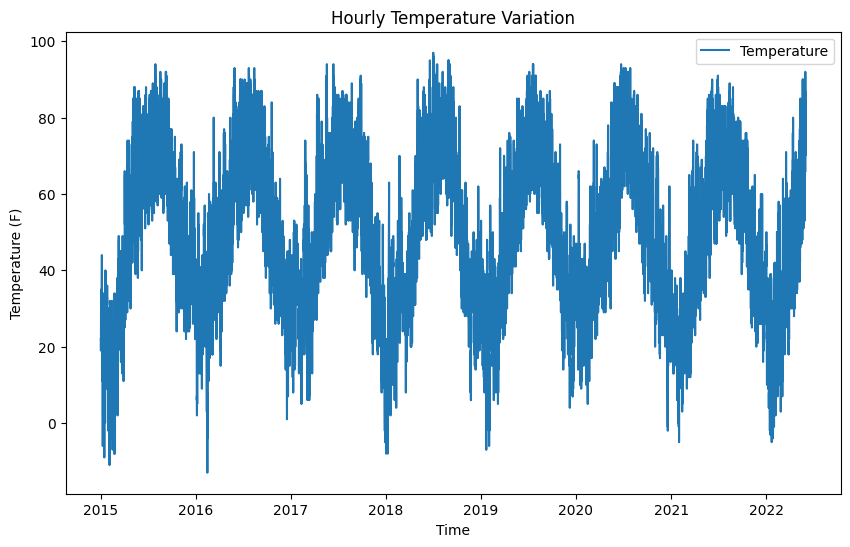

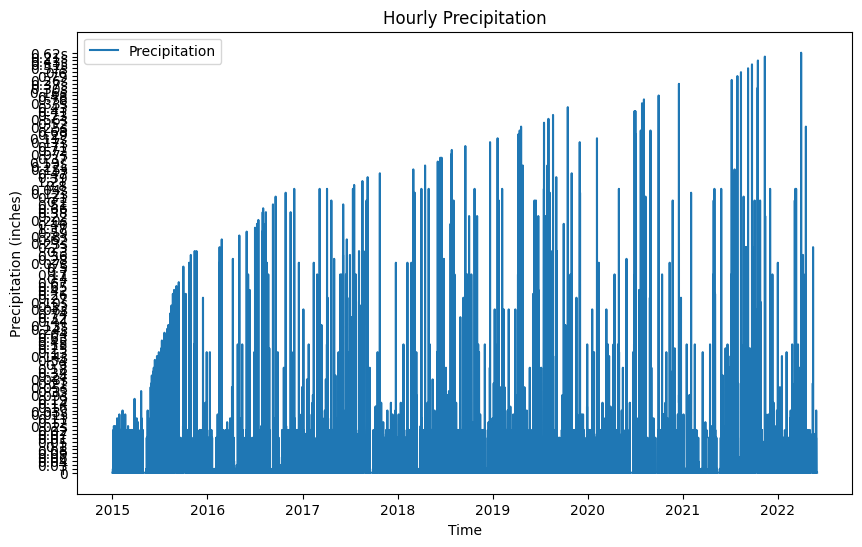

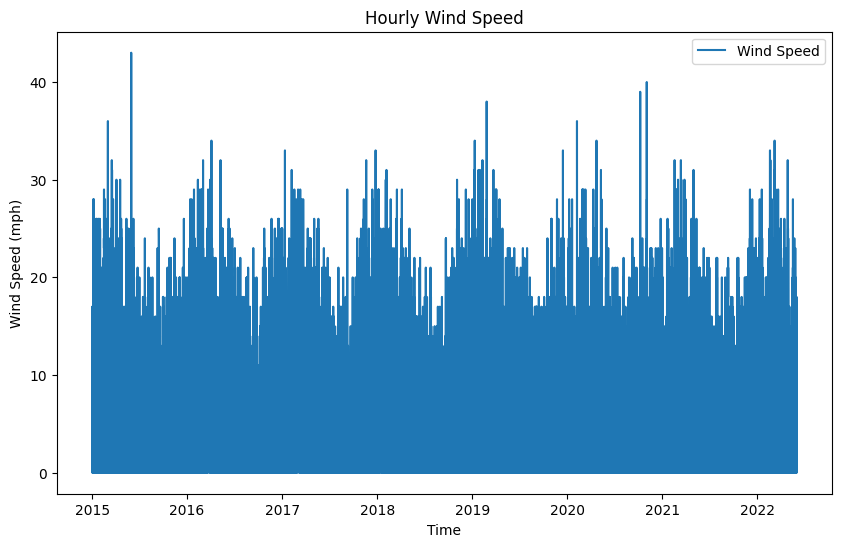

In [25]:
# Hourly temperature variation
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['DATE'], hourly_data['HourlyDryBulbTemperature'], label='Temperature')
plt.title('Hourly Temperature Variation')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

# Hourly precipitation
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['DATE'], hourly_data['HourlyPrecipitation'], label='Precipitation')
plt.title('Hourly Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()

# Hourly wind speed
plt.figure(figsize=(10, 6))
plt.plot(hourly_data['DATE'], hourly_data['HourlyWindSpeed'], label='Wind Speed')
plt.title('Hourly Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()


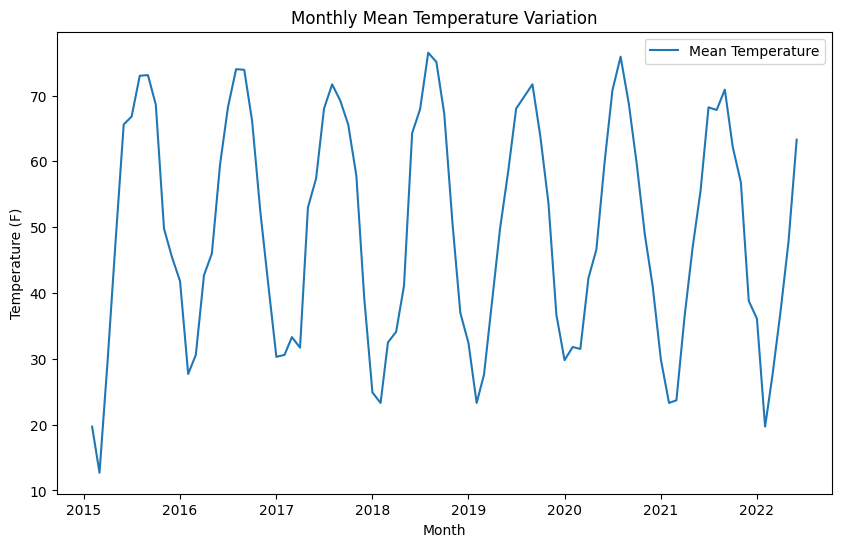

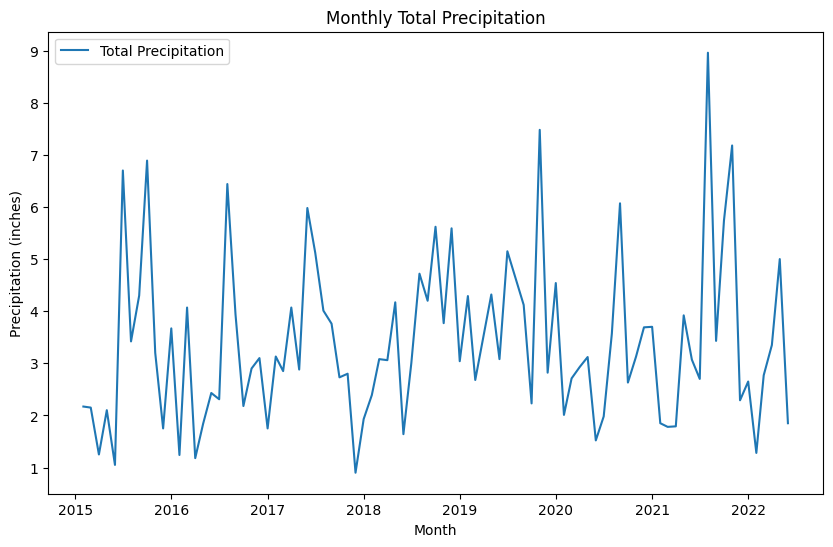

In [26]:
# Monthly temperature variation
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['DATE'], monthly_data['MonthlyMeanTemperature'], label='Mean Temperature')
plt.title('Monthly Mean Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

# Monthly precipitation
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['DATE'], monthly_data['MonthlyTotalLiquidPrecipitation'], label='Total Precipitation')
plt.title('Monthly Total Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()


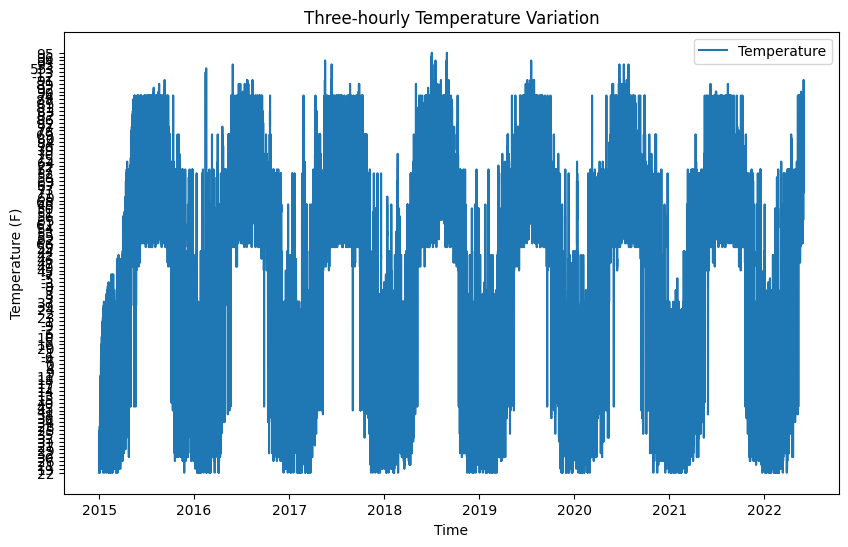

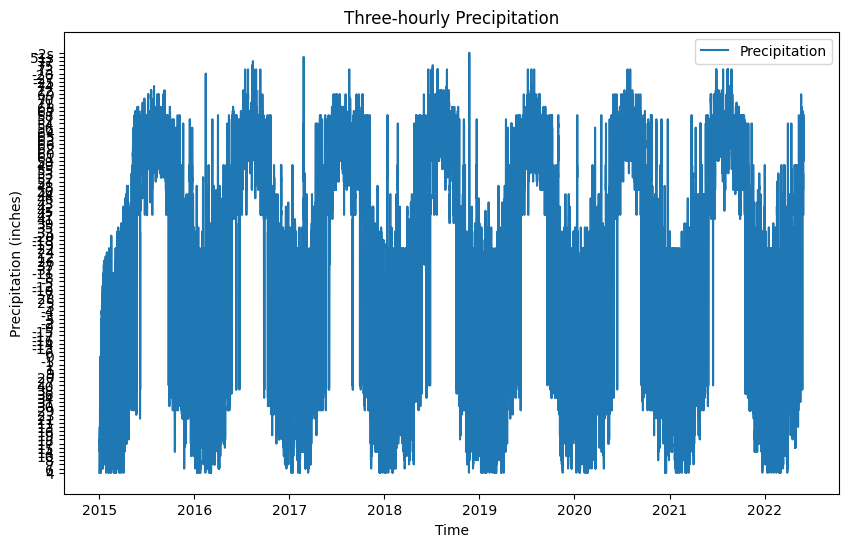

In [27]:
# Three-hourly temperature variation
plt.figure(figsize=(10, 6))
plt.plot(three_hour_data['DATE'], three_hour_data['HourlyDryBulbTemperature'], label='Temperature')
plt.title('Three-hourly Temperature Variation')
plt.xlabel('Time')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

# Three-hourly precipitation
plt.figure(figsize=(10, 6))
plt.plot(three_hour_data['DATE'], three_hour_data['HourlyDewPointTemperature'], label='Precipitation')
plt.title('Three-hourly Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (inches)')
plt.legend()
plt.show()


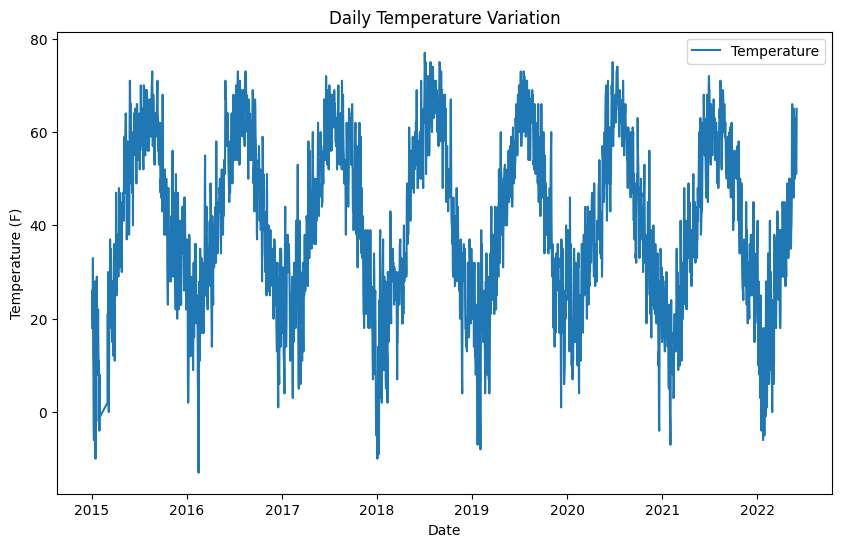

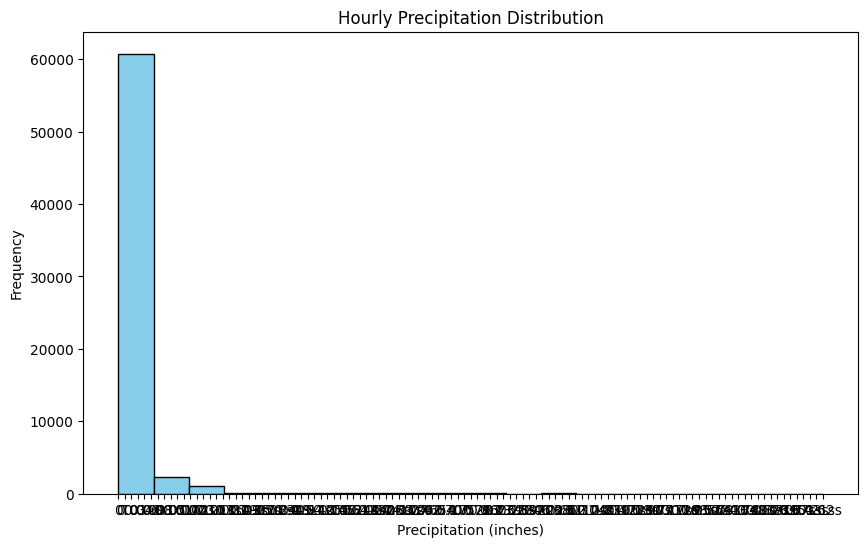

In [28]:
# Visualize the data using plots like time series plots, histograms, and boxplots
# Example:
import matplotlib.pyplot as plt

# Time series plot for Daily Data
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyMinimumDryBulbTemperature'], label='Temperature')
plt.title('Daily Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()

# Histogram for Hourly Data
plt.figure(figsize=(10, 6))
plt.hist(hourly_data['HourlyPrecipitation'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Hourly Precipitation Distribution')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()


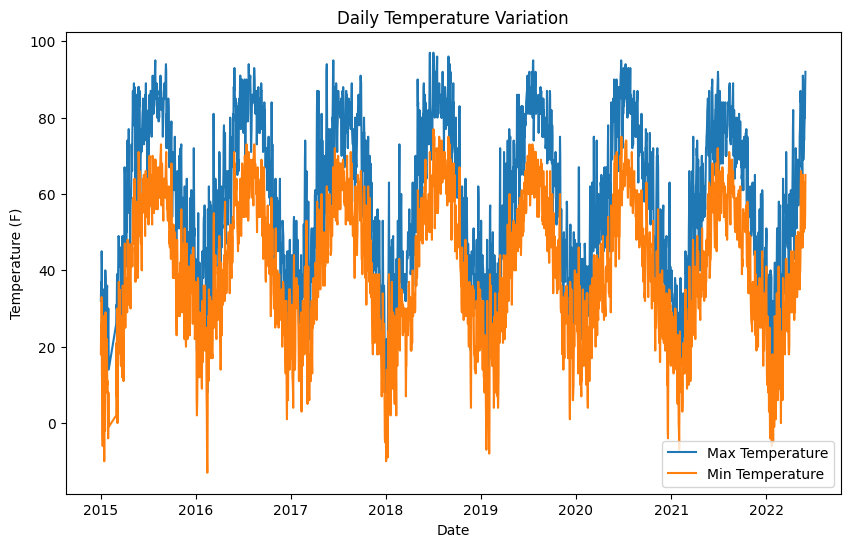

In [29]:
import matplotlib.pyplot as plt

# Example: Time series plot for temperature
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyMaximumDryBulbTemperature'], label='Max Temperature')
plt.plot(daily_data['DATE'], daily_data['DailyMinimumDryBulbTemperature'], label='Min Temperature')
plt.title('Daily Temperature Variation')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

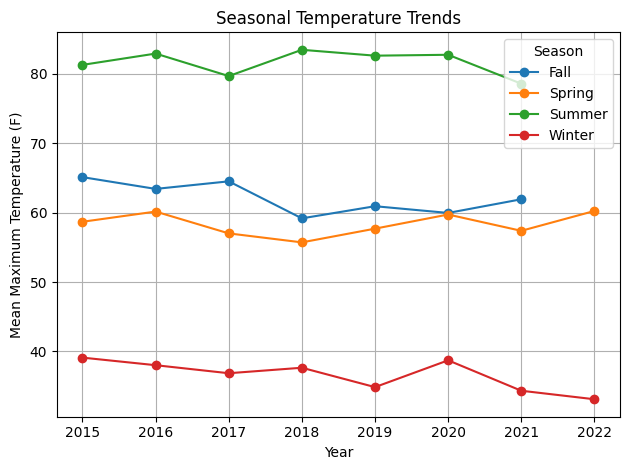

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_data' DataFrame contains your daily climate data

# Convert 'DATE' column to datetime format
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])

# Extract year and month from the date
daily_data['Year'] = daily_data['DATE'].dt.year
daily_data['Month'] = daily_data['DATE'].dt.month

# Define a function to map month to season
def map_to_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:                      # Fall: September, October, November
        return 'Fall'

# Apply the function to create a new 'Season' column
daily_data['Season'] = daily_data['Month'].apply(map_to_season)

# Aggregate data by season and year to calculate mean temperature
seasonal_data = daily_data.groupby(['Year', 'Season']).agg({'DailyMaximumDryBulbTemperature': 'mean'}).reset_index()

# Pivot the data for plotting
seasonal_pivot = seasonal_data.pivot(index='Year', columns='Season', values='DailyMaximumDryBulbTemperature')

# Plot seasonal trends
plt.figure(figsize=(10, 6))
seasonal_pivot.plot(marker='o')
plt.title('Seasonal Temperature Trends')
plt.xlabel('Year')
plt.ylabel('Mean Maximum Temperature (F)')
plt.xticks(seasonal_pivot.index)  # Set x-ticks to years
plt.grid(True)
plt.legend(title='Season')
plt.tight_layout()
plt.show()


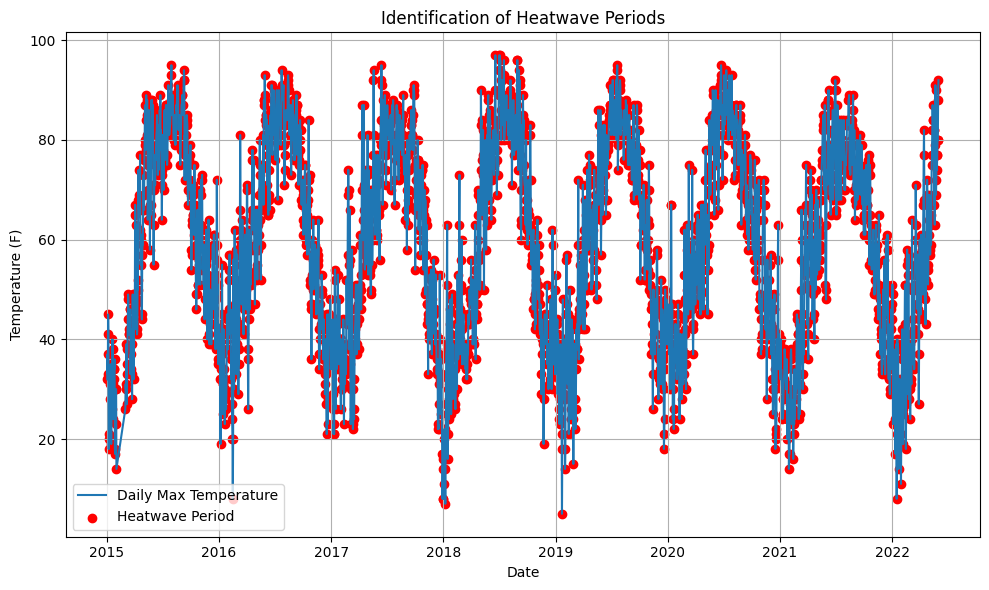

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_data' DataFrame contains your daily climate data

# Convert 'DATE' column to datetime format
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])

# Calculate rolling mean of temperature for a specified window (e.g., 7 days)
window = 7
daily_data['RollingMeanTemperature'] = daily_data['DailyMaximumDryBulbTemperature'].rolling(window=window).mean()

# Define a threshold for defining heatwaves (e.g., mean temperature above 90°F for 3 consecutive days)
heatwave_threshold = 90
consecutive_days_threshold = 3

# Identify periods of consecutive days above the threshold
heatwave_mask = daily_data['RollingMeanTemperature'] > heatwave_threshold
heatwave_periods = daily_data.groupby(heatwave_mask.ne(heatwave_mask.shift()).cumsum()).filter(lambda x: len(x) >= consecutive_days_threshold)

# Plot identified heatwave periods
plt.figure(figsize=(10, 6))
plt.plot(daily_data['DATE'], daily_data['DailyMaximumDryBulbTemperature'], label='Daily Max Temperature')
plt.scatter(heatwave_periods['DATE'], heatwave_periods['DailyMaximumDryBulbTemperature'], color='red', label='Heatwave Period')
plt.title('Identification of Heatwave Periods')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


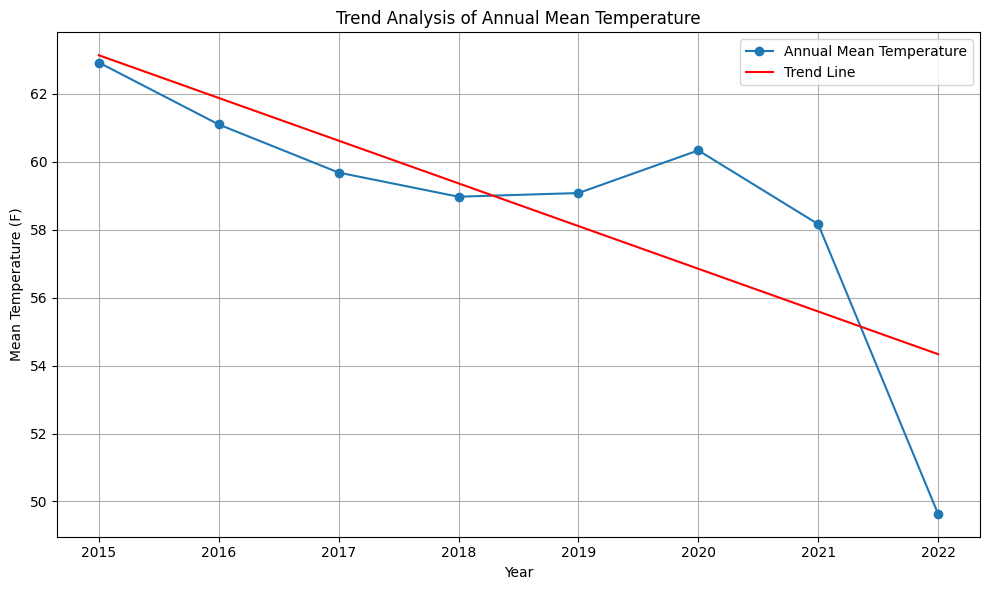

Trend (slope): -1.26 °F per year
P-value: 0.02


In [32]:
from scipy.stats import linregress

# Assuming 'daily_data' DataFrame contains your daily climate data

# Convert 'DATE' column to datetime format
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])

# Extract year from the date
daily_data['Year'] = daily_data['DATE'].dt.year

# Group by year and calculate the mean temperature
annual_mean_temperature = daily_data.groupby('Year')['DailyMaximumDryBulbTemperature'].mean()

# Perform linear regression to find the trend
slope, intercept, r_value, p_value, std_err = linregress(annual_mean_temperature.index, annual_mean_temperature)

# Plot the data and regression line
plt.figure(figsize=(10, 6))
plt.plot(annual_mean_temperature.index, annual_mean_temperature, marker='o', label='Annual Mean Temperature')
plt.plot(annual_mean_temperature.index, intercept + slope * annual_mean_temperature.index, 'r', label='Trend Line')
plt.title('Trend Analysis of Annual Mean Temperature')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (F)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the slope (trend) and p-value (significance)
print(f"Trend (slope): {slope:.2f} °F per year")
print(f"P-value: {p_value:.2f}")


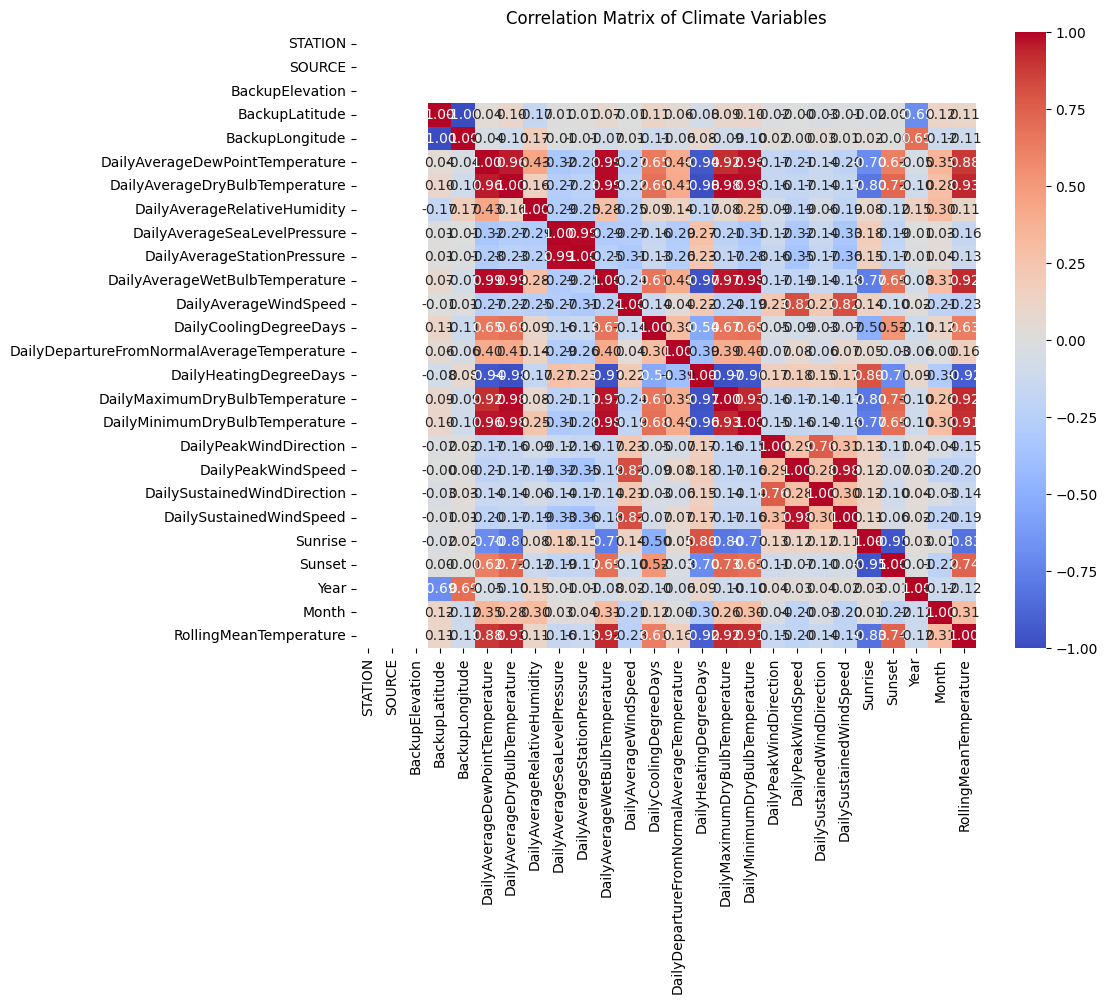

In [33]:
import seaborn as sns

# Select numeric columns for correlation analysis
numeric_columns = daily_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Variables')
plt.show()


In [34]:
# Conduct hypothesis tests to quantify relationships and identify significant changes
# Example:
from scipy.stats import ttest_ind

# Hypothesis test for difference in mean temperatures between two time periods
group1 = daily_data[daily_data['Year'] < 2000]['DailyAverageDryBulbTemperature']
group2 = daily_data[daily_data['Year'] >= 2000]['DailyAverageDryBulbTemperature']
t_stat, p_value = ttest_ind(group1, group2)
print("Hypothesis Test for Difference in Mean Temperatures:")
print("T-statistic:", t_stat)
print("P-value:", p_value)


Hypothesis Test for Difference in Mean Temperatures:
T-statistic: nan
P-value: nan


DATE
2015-01-01 23:59:00     8.8
2015-01-02 23:59:00     9.5
2015-01-03 23:59:00     4.3
2015-01-04 23:59:00    10.0
2015-01-05 23:59:00    16.8
Name: DailyAverageWindSpeed, dtype: float64


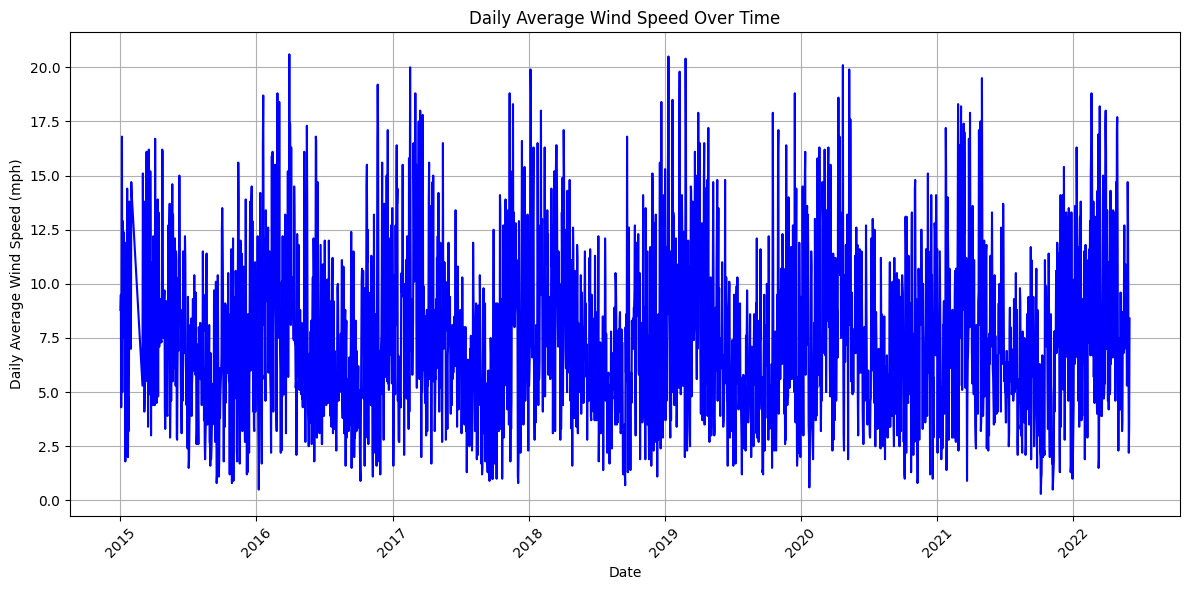

In [35]:
import pandas as pd

# Assuming 'daily_data' is your DataFrame containing the daily data
# Convert 'DATE' column to datetime format if not already done
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])

# Filter out rows where 'DailyAverageWindSpeed' is not null
filtered_data = daily_data[daily_data['DailyAverageWindSpeed'].notnull()]

# Group data by date and calculate the daily average wind speed
daily_avg_wind_speed = filtered_data.groupby('DATE')['DailyAverageWindSpeed'].mean()

# Print the first few rows of the result
print(daily_avg_wind_speed.head())
import matplotlib.pyplot as plt

# Assuming 'daily_avg_wind_speed' is the Series containing the daily average wind speed
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_wind_speed.index, daily_avg_wind_speed.values, color='blue')

# Adding labels and title
plt.title('Daily Average Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Average Wind Speed (mph)')

# Adding grid for better visualization
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


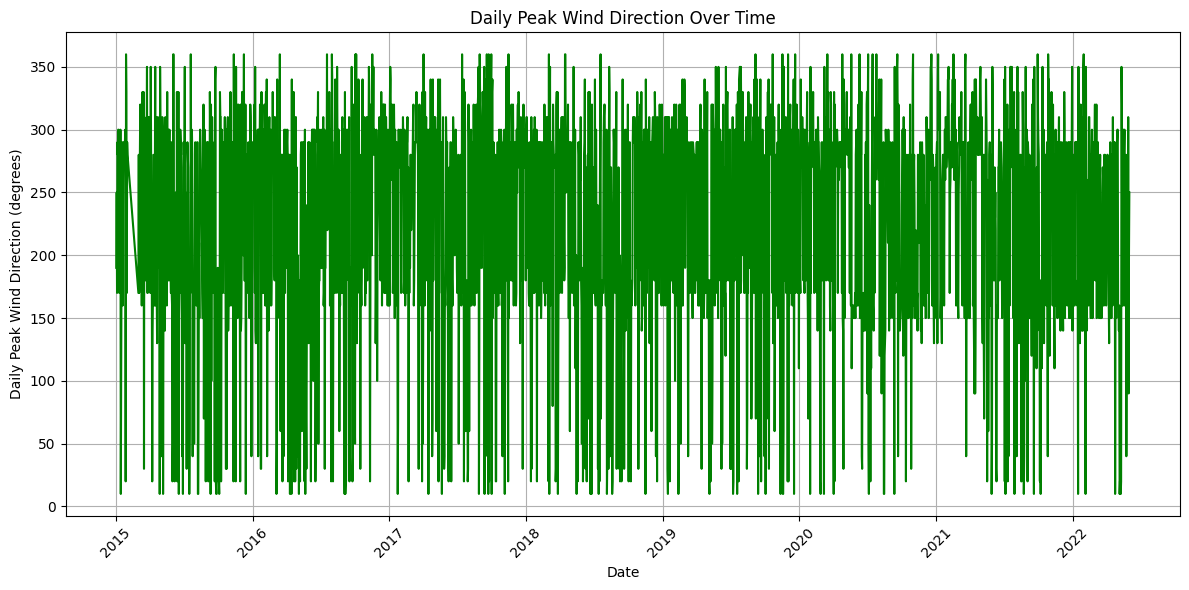

In [36]:
import matplotlib.pyplot as plt

# Convert 'DATE' column to datetime format if not already done
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])

# Filter out rows where 'DailyPeakWindDirection' is not null
filtered_data = daily_data[daily_data['DailyPeakWindDirection'].notnull()]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['DATE'], filtered_data['DailyPeakWindDirection'], color='green')

# Adding labels and title
plt.title('Daily Peak Wind Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Peak Wind Direction (degrees)')

# Adding grid for better visualization
plt.grid(True)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


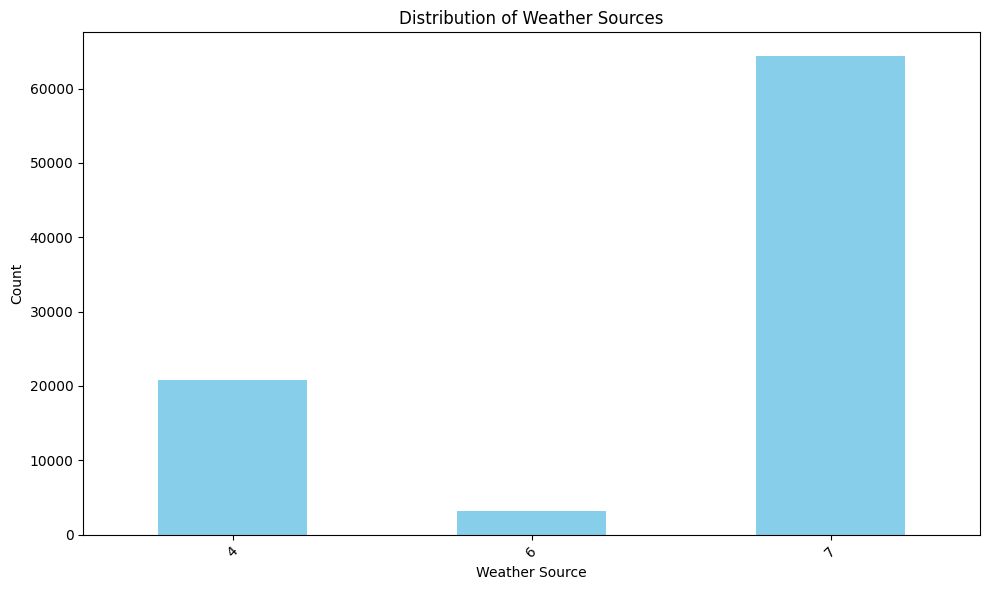

In [37]:
import matplotlib.pyplot as plt

# Count occurrences of weather sources in each dataset
daily_source_counts = daily_data['SOURCE'].value_counts()
hourly_source_counts = hourly_data['SOURCE'].value_counts()
monthly_source_counts = monthly_data['SOURCE'].value_counts()
three_hour_source_counts = three_hour_data['SOURCE'].value_counts()

# Combine counts from all datasets
all_source_counts = daily_source_counts.add(hourly_source_counts, fill_value=0)
all_source_counts = all_source_counts.add(monthly_source_counts, fill_value=0)
all_source_counts = all_source_counts.add(three_hour_source_counts, fill_value=0)

# Plotting the data
plt.figure(figsize=(10, 6))
all_source_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Weather Sources')
plt.xlabel('Weather Source')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


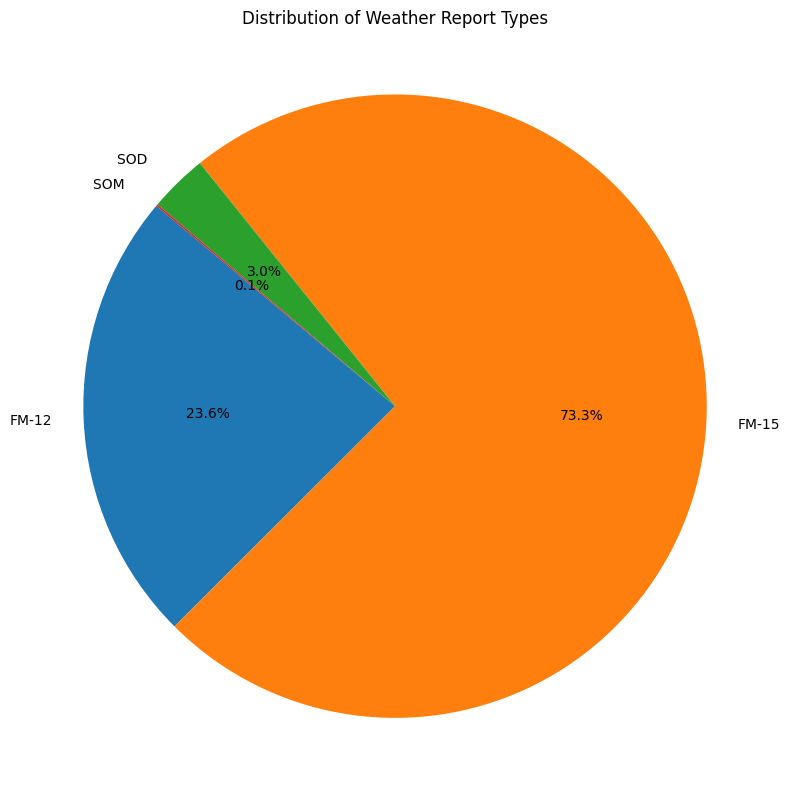

In [38]:
import matplotlib.pyplot as plt

# Count occurrences of report types in each dataset
daily_report_counts = daily_data['REPORT_TYPE'].value_counts()
hourly_report_counts = hourly_data['REPORT_TYPE'].value_counts()
monthly_report_counts = monthly_data['REPORT_TYPE'].value_counts()
three_hour_report_counts = three_hour_data['REPORT_TYPE'].value_counts()

# Combine counts from all datasets
all_report_counts = daily_report_counts.add(hourly_report_counts, fill_value=0)
all_report_counts = all_report_counts.add(monthly_report_counts, fill_value=0)
all_report_counts = all_report_counts.add(three_hour_report_counts, fill_value=0)

# Plotting the data
plt.figure(figsize=(8, 8))
plt.pie(all_report_counts, labels=all_report_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Weather Report Types')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()
